In [1]:
using PyCall
using Statistics
using Images

### Load image

In [2]:
rasterio = pyimport("rasterio")

PyObject <module 'rasterio' from '/Users/simon/anaconda3/envs/sentinel/lib/python3.7/site-packages/rasterio/__init__.py'>

In [3]:
f = open("data_path.txt")
path = readlines(f)
#path = "/Users/eyu/YOEO_local/data/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw1-slc-vv-20170315t053951-20170315t054016-004715-0083b0-004.tiff"
dataset = rasterio.open(path[1])
Show_img = dataset.read(1);

15240×25330 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                             

### normalize

In [4]:
Show_img = abs.(Show_img)
Show_img = Show_img./quantile(reshape(Show_img, :), 0.98);

### Show image

┌ Info: Recompiling stale cache file /Users/simon/.julia/compiled/v1.0/QuartzImageIO/n8vDP.ji for QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1190


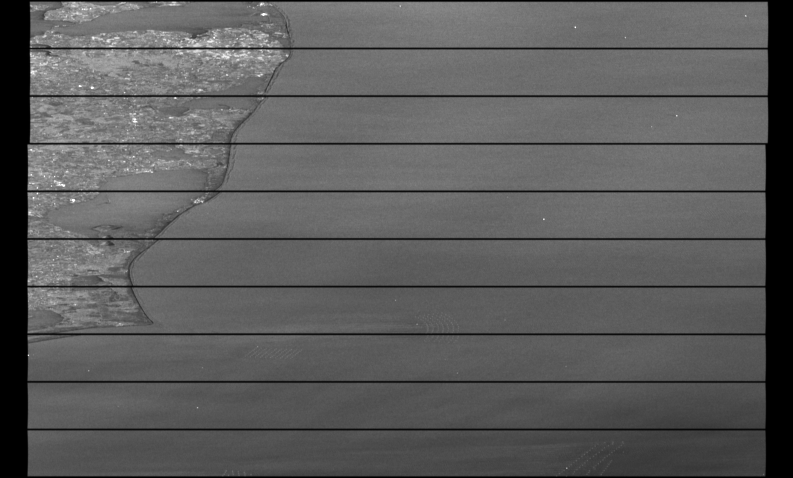

In [5]:
Gray.(Show_img)

In [6]:
cr1_index = [1126, 6086]
cr2_index = [1123, 6099]
cr3_index = [1127, 6109]


2-element Array{Int64,1}:
 1127
 6109

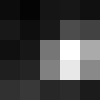

In [48]:
reflector = copy(Show_img[(cr1_index[1]-2):(cr1_index[1]+2),(cr1_index[2]-2):(cr1_index[2]+2)])
reflector = reflector./maximum(reshape(reflector, :))

Gray.(reflector)

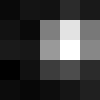

In [49]:
reflector = copy(Show_img[(cr2_index[1]-2):(cr2_index[1]+2),(cr2_index[2]-2):(cr2_index[2]+2)])
reflector = reflector./maximum(reshape(reflector, :))

Gray.(reflector)

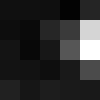

In [50]:
reflector = copy(Show_img[(cr3_index[1]-2):(cr3_index[1]+2),(cr3_index[2]-2):(cr3_index[2]+2)])
reflector = reflector./maximum(reshape(reflector, :))

Gray.(reflector)

In [32]:
size(Show_img)

(15240, 25330)

In [34]:
Burst_1 = Show_img[1:1524,1:end];

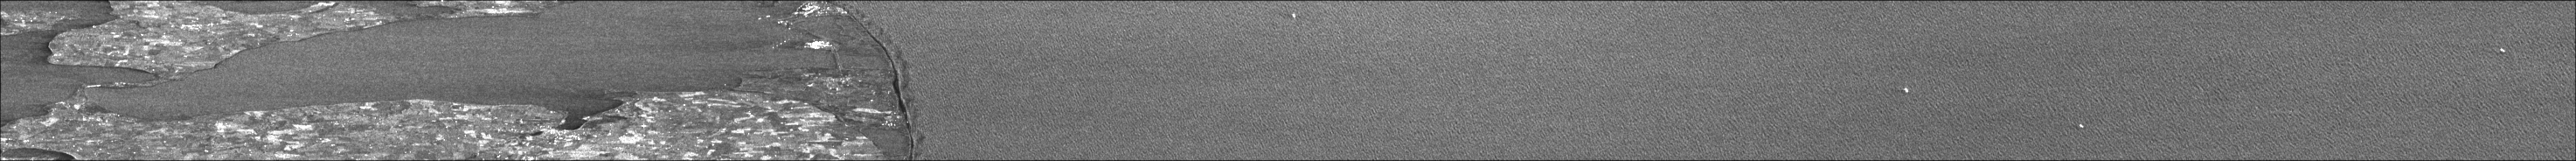

In [42]:
Gray.(Burst_1[32:end-32,946:24512])

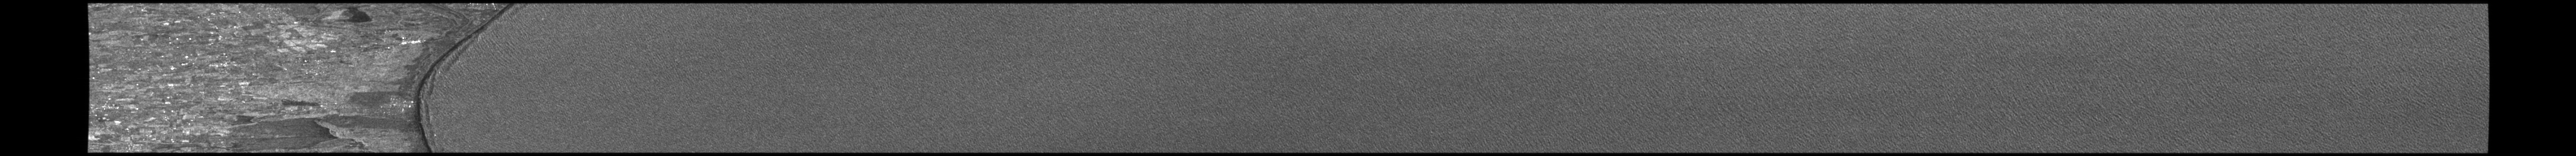

In [43]:
Burst_5 = Show_img[1524*5:1524*6,1:end]
Gray.(Burst_5)

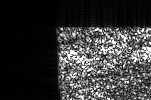

In [44]:
Gray.(Burst_5[1:100,800:950])